In [78]:
# Câu 1 (10 điểm)
# Sử dụng thư viện pandas, đọc toàn bộ dữ liệu này vào 1 dataframe tên là churn_df
import pandas as pd
churn_df = pd.read_csv('customer_churn.csv')

In [79]:
# Câu 2 (5 điểm)
# In ra 10 dòng dữ liệu đầu tiên của churn_df
churn_df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [80]:
# Câu 3 (10 điểm)
# Dùng các câu lệnh hợp lý của pandas để in ra thông tin các cột của bộ dữ liệu
# Cho biết những cột thuộc tính nào KHÔNG PHẢI dạng số (numeric)
churn_df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [81]:
print('Các cột không phải dạng số là: state, area_code, international_plan, voice_mail_plan, churn')

Các cột không phải dạng số là: state, area_code, international_plan, voice_mail_plan, churn


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

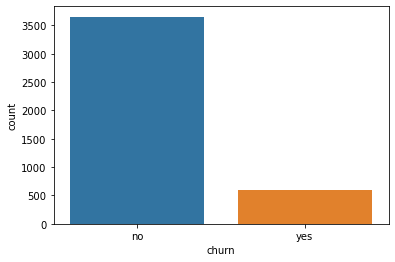

In [82]:
# Câu 4 (15 điểm)
# Vẽ biểu đồ cột thể hiện tương quan số khách hàng rời bỏ / không rời bỏ dịch vụ
# Gợi ý: Có thể dùng matplotlib hoặc seaborn
import seaborn as sns
sns.countplot(churn_df['churn'])

In [89]:
# Câu 5 (10 điểm)
# Chọn cột cuối làm y, các cột trước đó, trừ cột [account_length, area_code, international_plan, voice_mail_plan] làm X
features=['state','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge',
          'total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls',
          'total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','number_customer_service_calls']
target=['churn']
X=churn_df[features]
y=churn_df[target]
# Dùng LabelEncoder để chuyển dữ liệu cột state từ dạng categorical sang dạng numerical
from sklearn.preprocessing import LabelEncoder
X['state'] = le.fit_transform(X['state'])

C:\Users\Admin\AppData\Local\Temp/ipykernel_11564/3563749754.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['state'] = le.fit_transform(X['state'])


In [90]:
# Câu 6 (10 điểm) 
# Chia dữ liệu thành 2 phần (X_train, y_train), (X_test, y_test) với tỷ lệ 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
print(X_train)
print(y_train)
print(X_test)
print(y_test)
# In ra X_train, y_train để kiểm tra
print(X_train)
print(y_train)

      state  number_vmail_messages  total_day_minutes  total_day_calls  \
3273     31                      0              259.6              138   
1112     30                      0              254.3              113   
3740      8                     39              147.3               75   
2133     45                      0              189.3              119   
3523     37                      0              222.3              102   
...     ...                    ...                ...              ...   
2437      2                     19              157.3              123   
1004      7                     33              231.8               78   
3914     39                      0              212.4              118   
3345     17                      0              172.7               90   
4088     36                      0              211.3               91   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
3273             44.13         

In [91]:
# Câu 7 (10 điểm)
# Sử dụng Logistic Regression, xây dựng mô hình dự đoán khách hàng rời bỏ dịch vụ với (X_train, y_train)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='newton-cg', max_iter=150)
model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=150, solver='newton-cg')

In [92]:
# Câu 8 (5 điểm)
# In ra độ chính xác của mô hình vừa huấn luyện trên tập (X_test, y_test)
from sklearn.metrics import accuracy_score
pred2 = model.predict(X_test)
accuracy2 = accuracy_score(y_test, pred2)
print('Độ chính xác của mô hình là:',accuracy2)

Độ chính xác của mô hình là: 0.8682352941176471


In [93]:
# Câu 9 (5 điểm)
# Cho khách hàng có thông tin như sau: 
# state: NJ=31, number_vmail_message: 24, các cột sau lần lượt: 208,	88,	35,	312, 108,	33,	212.6,	118,	9.57,	8.5,	7,	2.4,	3
# Dùng model vừa huấn luyện để dự đoán khả năng rời bỏ của khách hàng này 
x=[[31,24,208,88,35,312,108,33,212.6,118,9.57,8.5,7,2.4,3]]
prediction = model.predict(x)
print(prediction)

['no']
